In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.iloc[500:510]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400,GOOGLE
2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200,GOOGLE
2022-09-30,238.289993,240.539993,232.729996,232.899994,230.671524,35694800,MICROSOFT
2022-10-03,235.410004,241.610001,234.660004,240.740005,238.436508,28880400,MICROSOFT
2022-10-04,245.089996,250.360001,244.979996,248.880005,246.498627,34888400,MICROSOFT
2022-10-05,245.990005,250.580002,244.100006,249.199997,246.815567,20347100,MICROSOFT
2022-10-06,247.929993,250.339996,246.080002,246.789993,244.428619,20239900,MICROSOFT
2022-10-07,240.899994,241.320007,233.169998,234.240005,231.998734,37769600,MICROSOFT
2022-10-10,233.050003,234.559998,226.729996,229.250000,227.056473,29743600,MICROSOFT


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,161.787451,163.526255,160.234661,161.938247,161.525120,6.718230e+07
std,19.188930,18.938884,19.404881,19.136270,19.320223,2.193880e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.815002,147.459999,144.185005,146.014999,145.410995,5.123105e+07
50%,161.419998,162.139999,160.080002,160.800003,160.361343,6.219900e+07
75%,177.799995,179.660004,176.665001,177.805000,177.655098,7.710105e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-09-30 to 2023-09-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


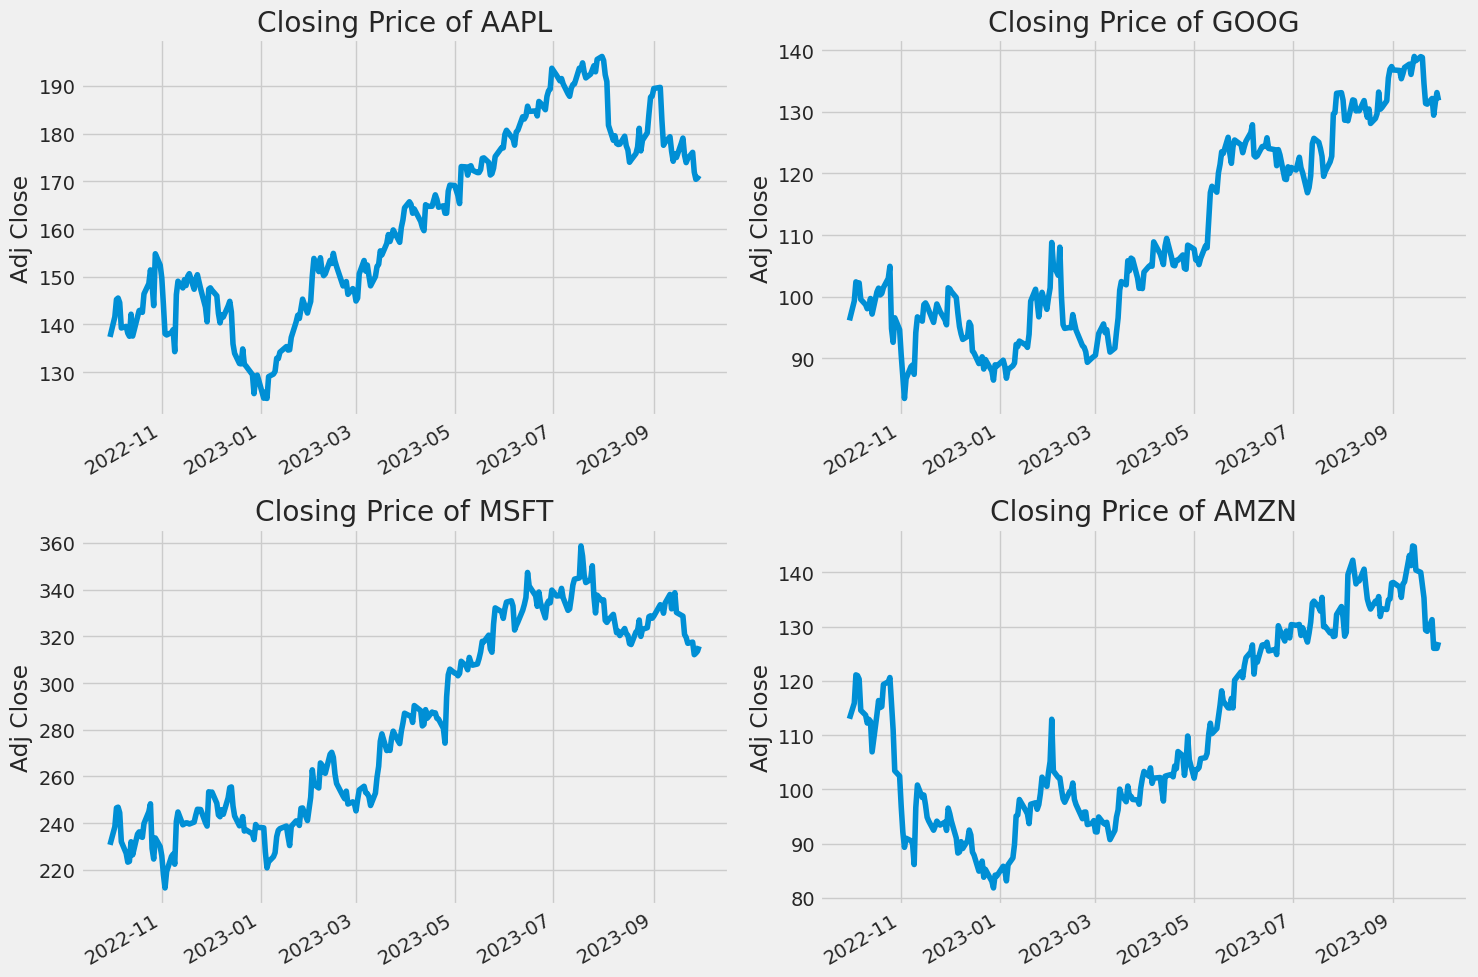

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

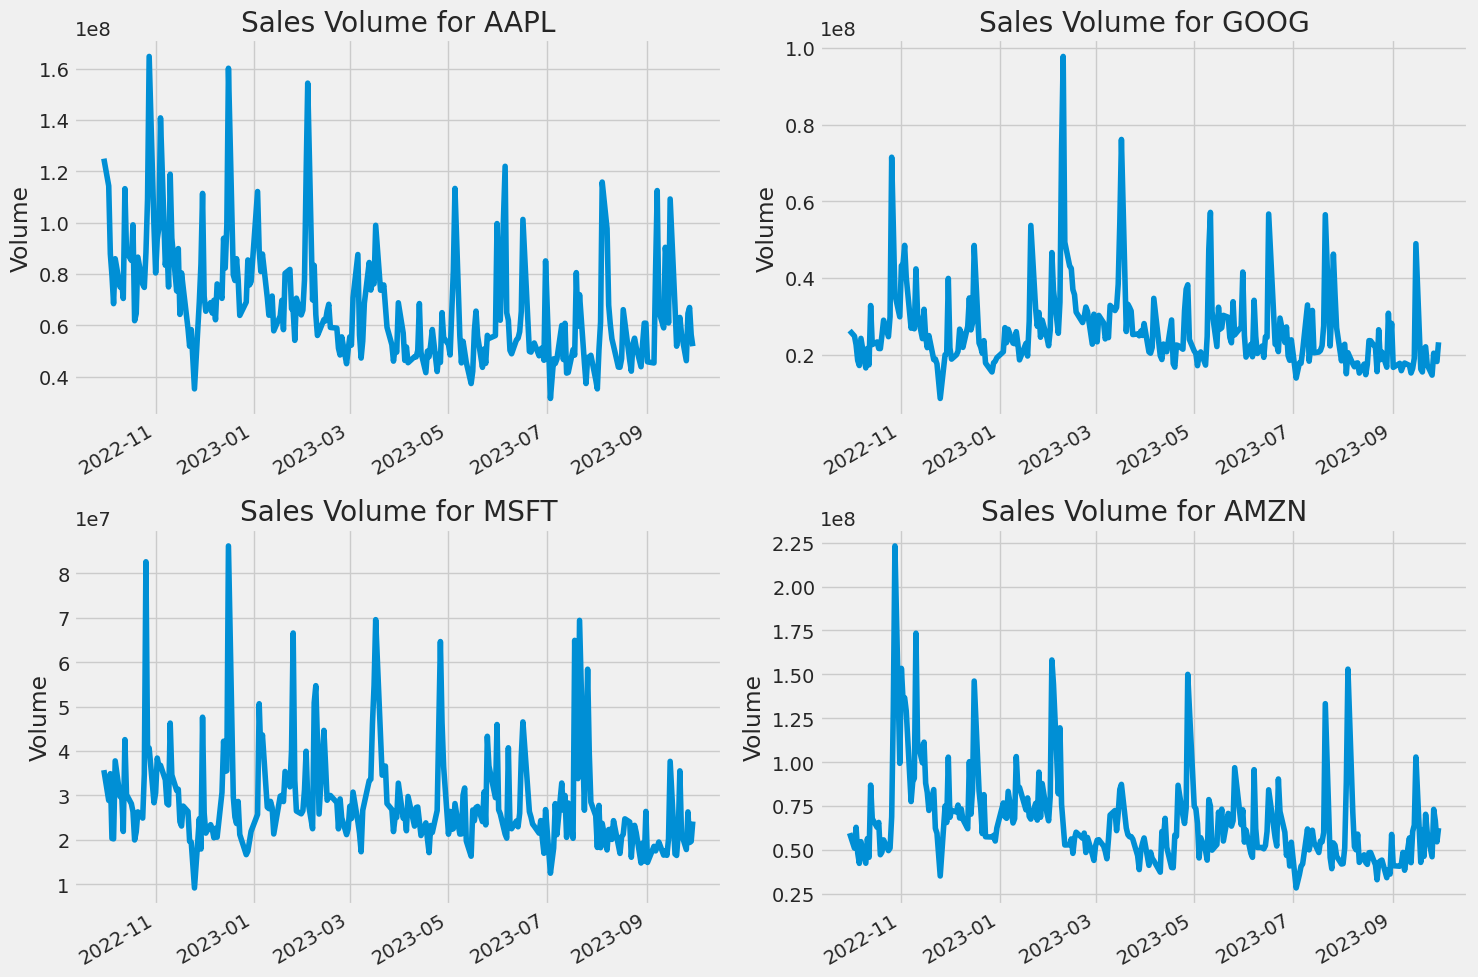

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

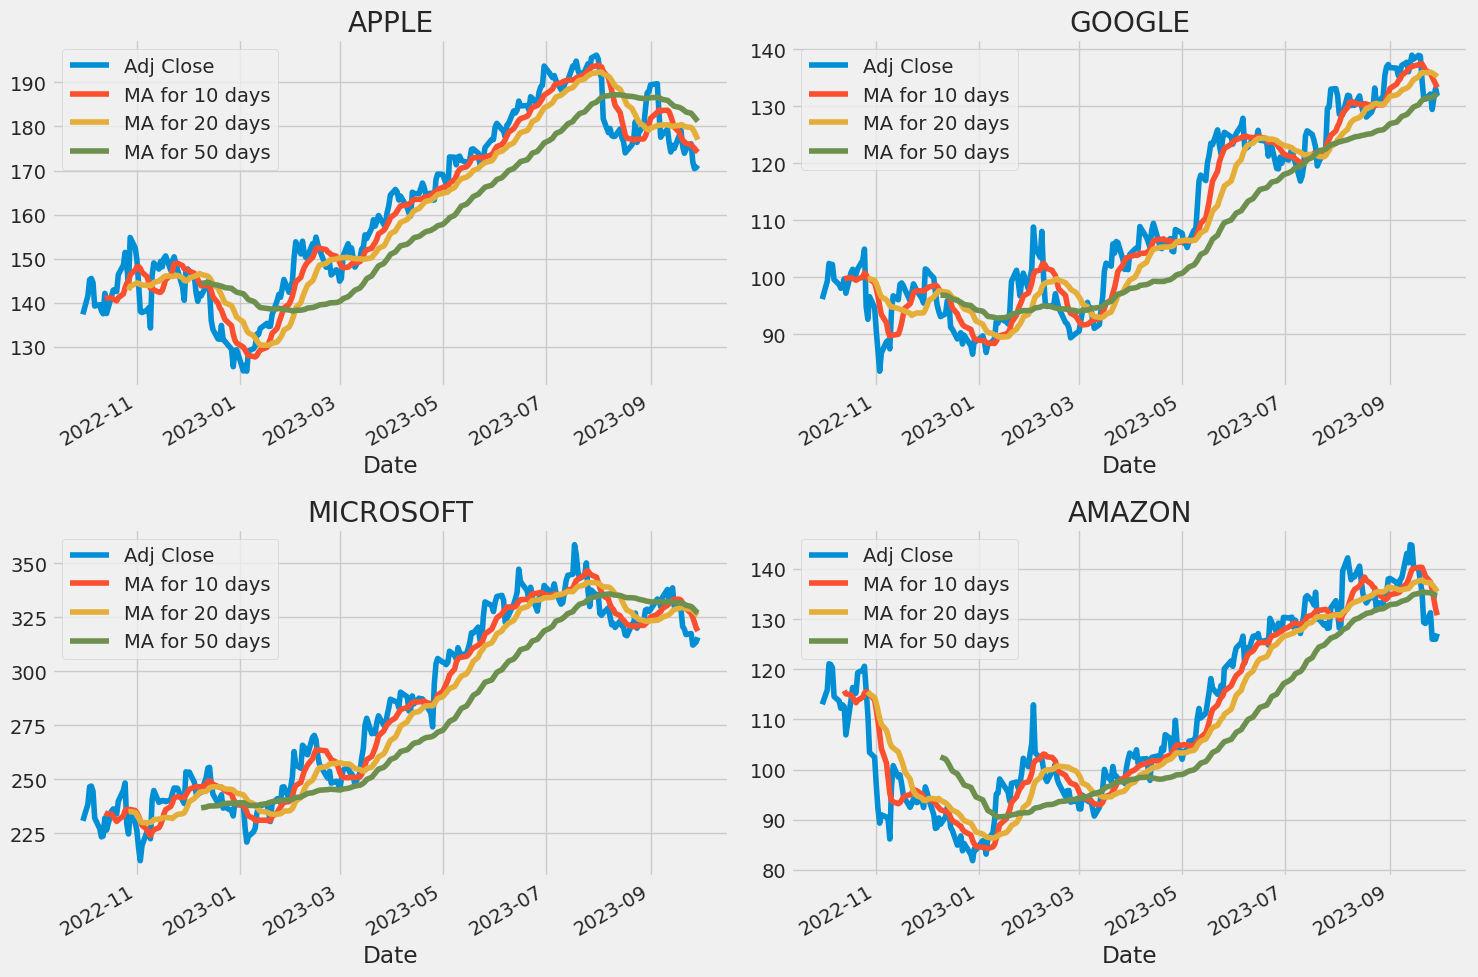

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

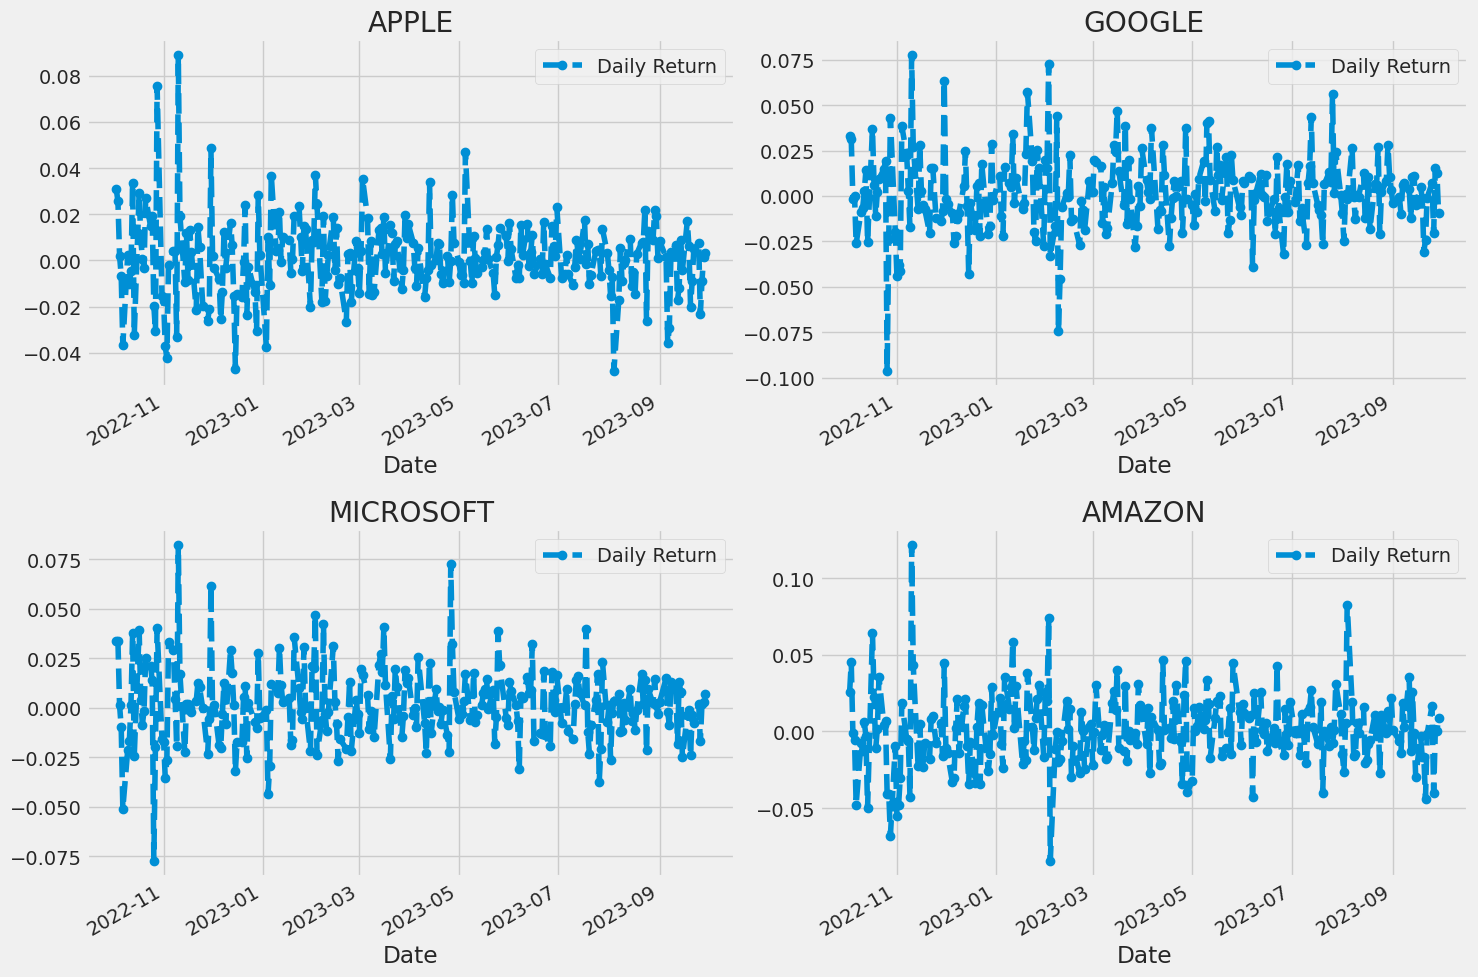

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

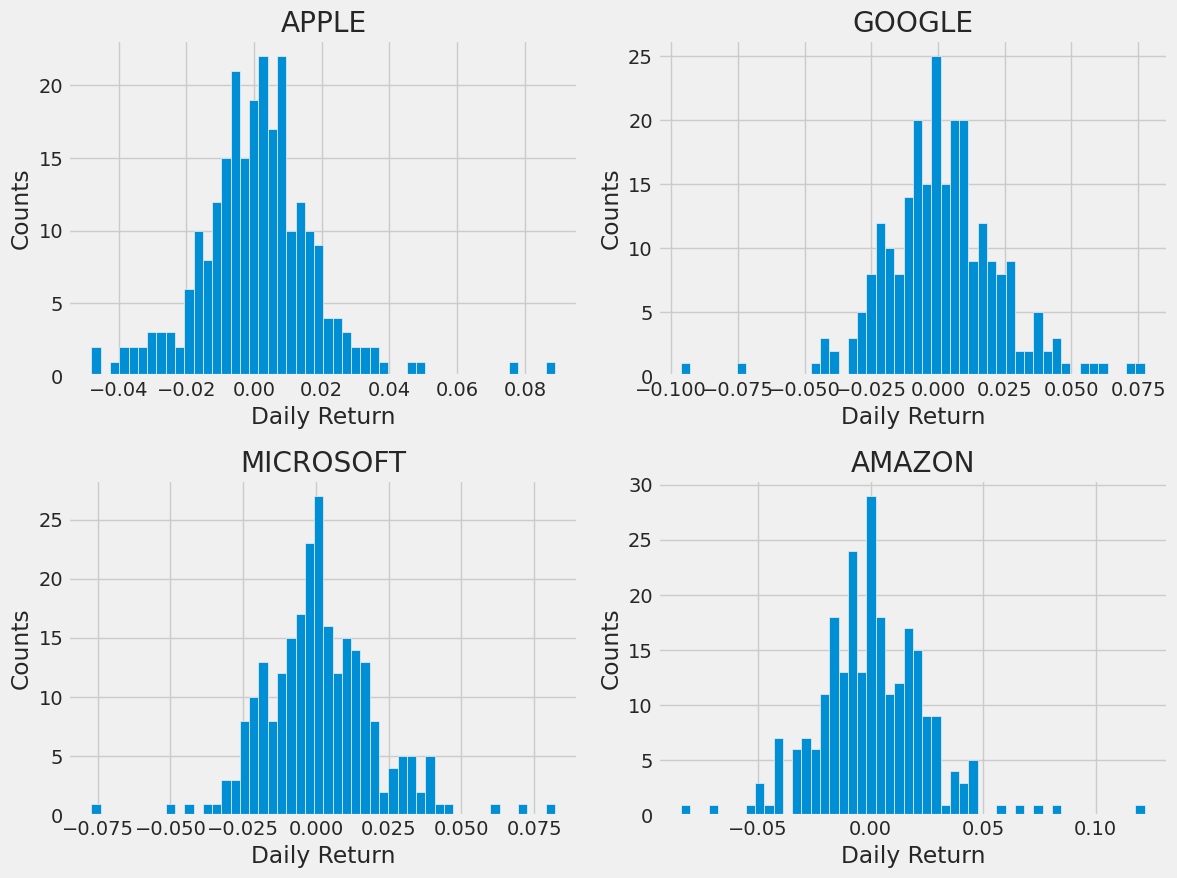

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-30,NaN,NaN,NaN,NaN
2022-10-03,0.030753,0.025487,0.032761,0.033663
2022-10-04,0.025623,0.044960,0.031319,0.033812
2022-10-05,0.002053,-0.001156,-0.001855,0.001286
2022-10-06,-0.006626,-0.005374,0.000196,-0.009671


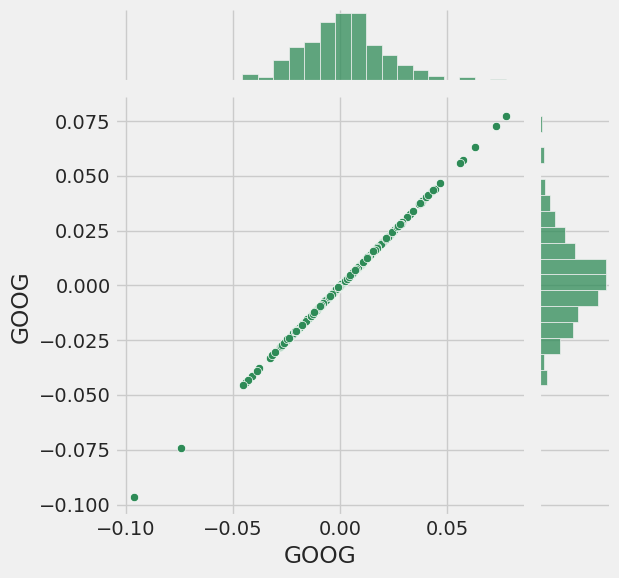

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


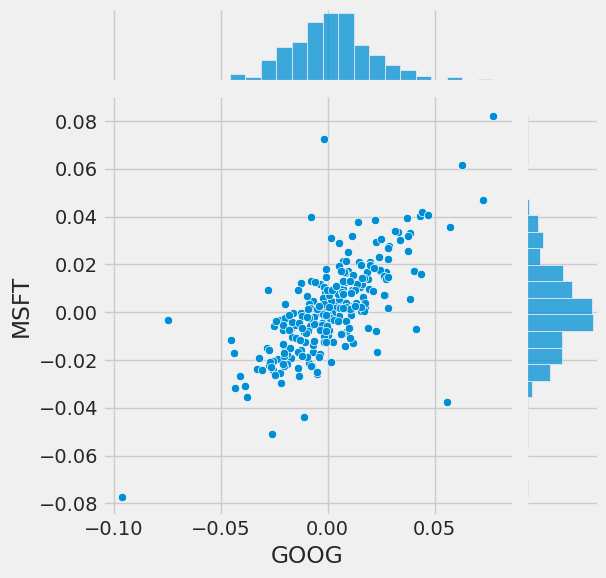

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

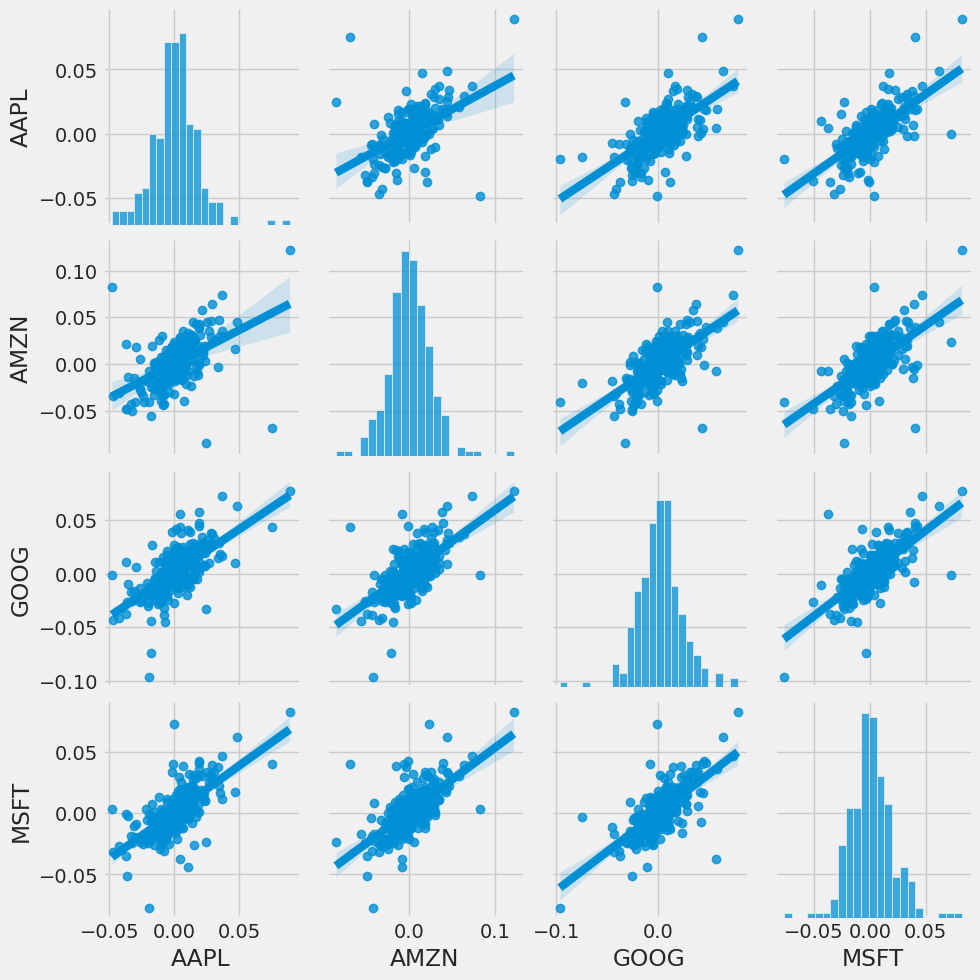

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

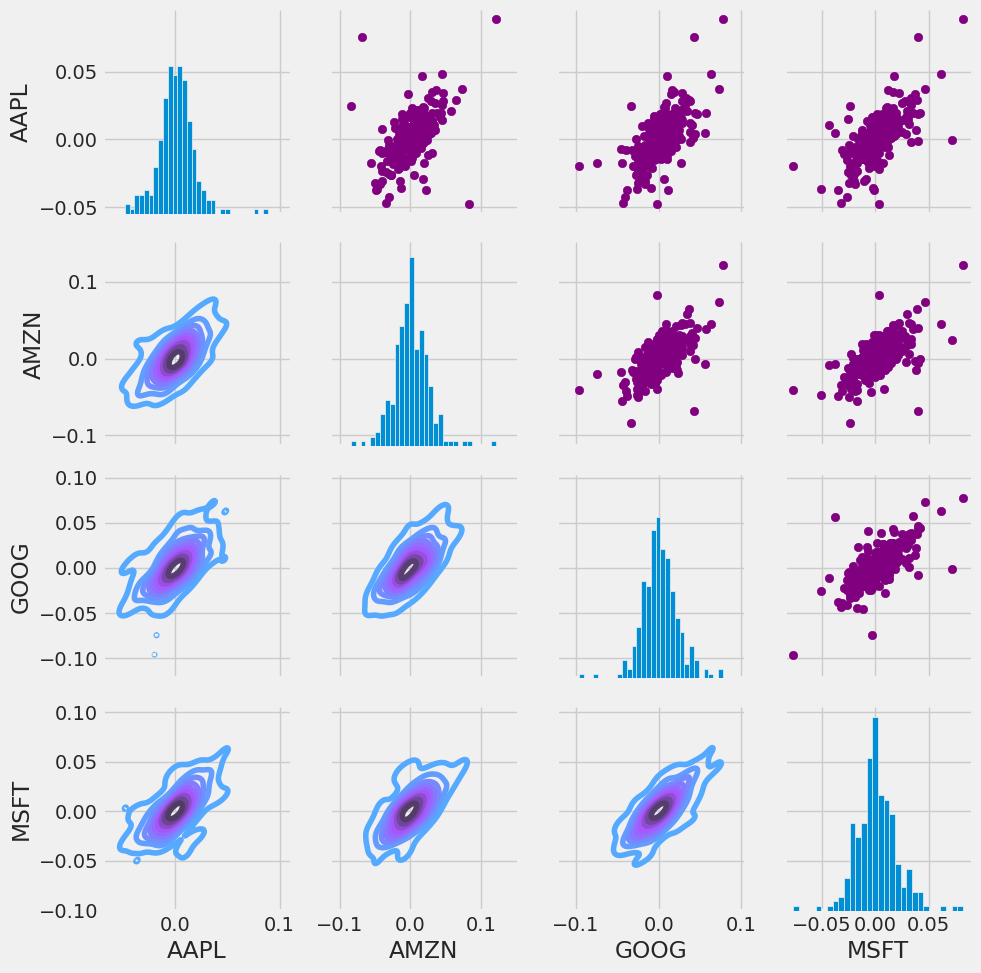

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

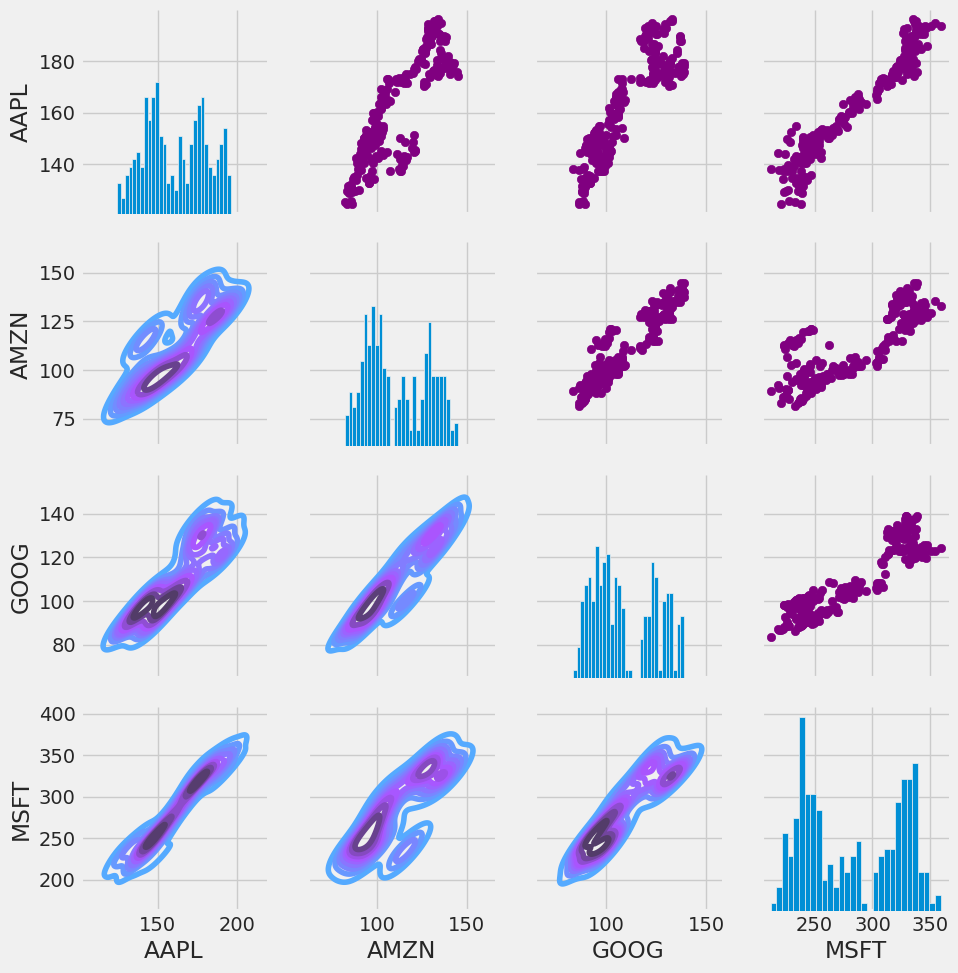

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

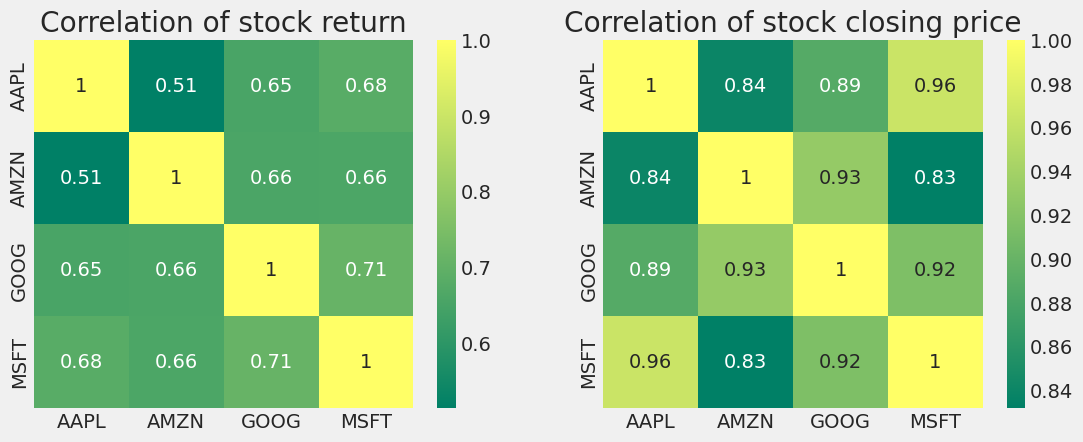

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

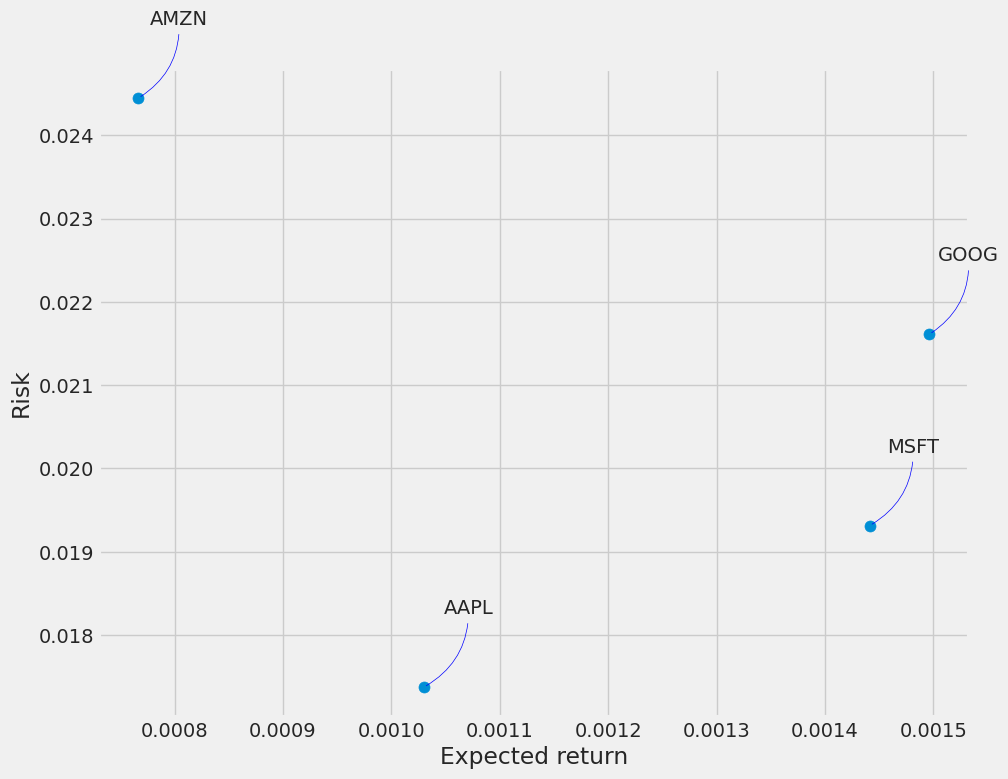

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2021-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331688,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906021,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817413,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929306,105158200
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


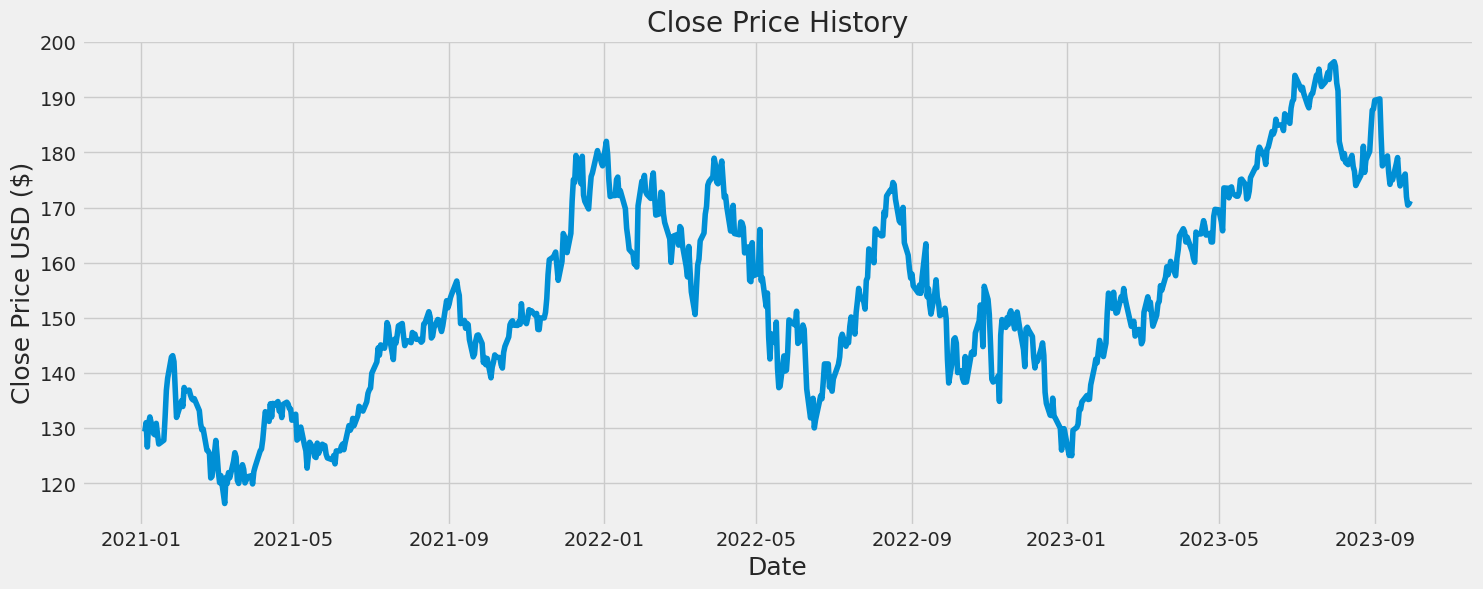

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

656

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16294174],
       [0.18291915],
       [0.12785614],
       [0.18179546],
       [0.19590465],
       [0.15757268],
       [0.1553253 ],
       [0.18142089],
       [0.15669876],
       [0.13459857],
       [0.14321391],
       [0.19565487],
       [0.25608685],
       [0.2835561 ],
       [0.3316269 ],
       [0.3346236 ],
       [0.32088898],
       [0.25883377],
       [0.19478096],
       [0.22200024],
       [0.23261338],
       [0.21950309],
       [0.26257959],
       [0.25471338],
       [0.25658639],
       [0.24534892],
       [0.23760769],
       [0.23436141],
       [0.23735791],
       [0.21013863],
       [0.18079656],
       [0.16668756],
       [0.16868517],
       [0.12036459],
       [0.11861656],
       [0.1122487 ],
       [0.05780993],
       [0.06118119],
       [0.14271446],
       [0.10937698],
       [0.0711699 ],
       [0.047072  ],
       [0.0631789 ],
       [0.        ],
       [0.05905851],
       [0.04519919],
       [0.06992132],
       [0.058

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16294174, 0.18291915, 0.12785614, 0.18179546, 0.19590465,
       0.15757268, 0.1553253 , 0.18142089, 0.15669876, 0.13459857,
       0.14321391, 0.19565487, 0.25608685, 0.2835561 , 0.3316269 ,
       0.3346236 , 0.32088898, 0.25883377, 0.19478096, 0.22200024,
       0.23261338, 0.21950309, 0.26257959, 0.25471338, 0.25658639,
       0.24534892, 0.23760769, 0.23436141, 0.23735791, 0.21013863,
       0.18079656, 0.16668756, 0.16868517, 0.12036459, 0.11861656,
       0.1122487 , 0.05780993, 0.06118119, 0.14271446, 0.10937698,
       0.0711699 , 0.047072  , 0.0631789 , 0.        , 0.05905851,
       0.04519919, 0.06992132, 0.05830938, 0.09526779, 0.11499562,
       0.10488203, 0.0520664 , 0.04532398, 0.08777624, 0.0771632 ,
       0.04657255, 0.05281553, 0.06055686, 0.06280433, 0.04420029])]
[0.07229368435853067]

[array([0.16294174, 0.18291915, 0.12785614, 0.18179546, 0.19590465,
       0.15757268, 0.1553253 , 0.18142089, 0.15669876, 0.13459857,
       0.14321391, 0.19565487, 0.25

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
596/596 [==============================] - 16s 21ms/step - loss: 0.0078
Epoch 2/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0035
Epoch 3/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0027
Epoch 4/20
596/596 [==============================] - 13s 21ms/step - loss: 0.0022
Epoch 5/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0020
Epoch 6/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0020
Epoch 7/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0017
Epoch 8/20
596/596 [==============================] - 14s 23ms/step - loss: 0.0016
Epoch 9/20
596/596 [==============================] - 14s 23ms/step - loss: 0.0019
Epoch 10/20
596/596 [==============================] - 13s 23ms/step - loss: 0.0017
Epoch 11/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0017
Epoch 12/20
596/596 [==============================] - 13s 22ms/step - loss: 0.0018
E

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 13ms/step


2.607179718659337

<ipython-input-153-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


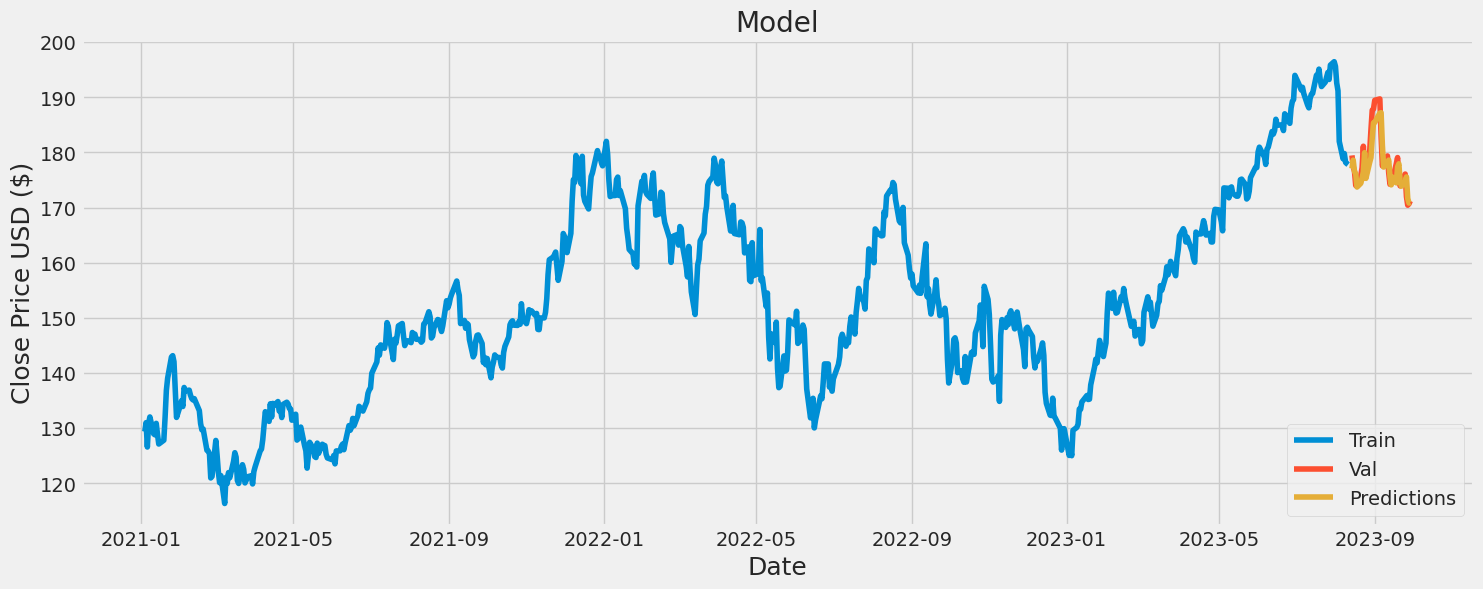

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2023-08-14,179.460007,177.089859
2023-08-15,177.449997,178.600769
2023-08-16,176.570007,176.542175
2023-08-17,174.000000,176.111115
2023-08-18,174.490005,173.720795
2023-08-21,175.839996,174.411453
2023-08-22,177.229996,175.371277
2023-08-23,181.119995,176.495667
2023-08-24,176.380005,179.958084
